# Naive Bayes Classification (Наивная байесовская классификация)

Наивные байесовские модели представляют собой группу чрезвычайно быстрых и простых алгоритмов классификации, которые часто подходят для наборов данных очень большой размерности.
Поскольку они такие быстрые и имеют так мало настраиваемых параметров, они оказываются очень полезными в качестве быстрой и грязной основы для задачи классификации.
В этом разделе основное внимание будет уделено интуитивному объяснению того, как работают наивные байесовские классификаторы, а затем приведено несколько примеров их работы с некоторыми наборами данных.


## Байесовская классификация

Наивные байесовские классификаторы построены на методах байесовской классификации. Они основаны на теореме Байеса, которая представляет собой уравнение, описывающее отношение условных вероятностей статистических величин. В байесовской классификации нас интересует нахождение вероятности метки с учетом некоторых наблюдаемых признаков, которую мы можем записать как $P(L~|~{\rm features})$.
Теорема Байеса говорит нам, как выразить это в терминах величинах, которые мы можем вычислить непосредственно:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

Если мы пытаемся выбрать между двумя метками — назовем их $L_1$ и $L_2$ — то один из способов сделать это решение — вычислить отношение апостериорных вероятностей для каждой метки.:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

Все, что нам сейчас нужно, — это некоторая модель, с помощью которой мы можем вычислить $P({\rm features}~|~L_i)$ для каждой метки.
Такая модель называется *генеративной моделью*, потому что она определяет гипотетический случайный процесс, генерирующий данные.
Указание этой генеративной модели для каждой метки является основной частью обучения такого байесовского классификатора.
Общий вариант такого обучающего шага — очень сложная задача, но мы можем упростить ее, используя некоторые упрощающие предположения о виде этой модели.

Вот где проявляется «наивность» в «наивном байесовском подходе»: если мы делаем очень наивные предположения о генеративной модели для каждой метки, мы можем найти грубое приближение генеративной модели для каждого класса, а затем перейти к байесовской классификации. .
Различные типы наивных байесовских классификаторов основаны на разных наивных предположениях о данных, и мы рассмотрим некоторые из них в следующих разделах.

Начнем со стандартного импорта:

In [9]:
import numpy as np # Библиотерка для работы с матрицами, полиномами
import matplotlib.pyplot as plt # Построение графиков
import seaborn as sns; sns.set()

## Гауссовский наивный байесовский метод

Возможно, самый простой для понимания наивный байесовский классификатор — это гауссовский наивный байесовский классификатор.
В этом классификаторе предполагается, что *данные каждой метки взяты из простого распределения Гаусса*.
Представьте, что у вас есть следующие данные:

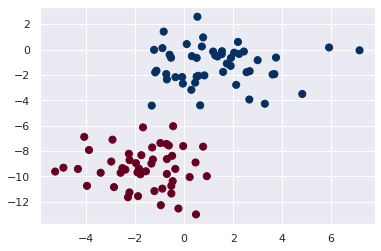

In [ ]:
from sklearn.datasets import make_blobs # генерация датасета
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Один чрезвычайно быстрый способ создать простую модель — предположить, что данные описываются распределением Гаусса без ковариации между измерениями.
Эту модель можно подобрать, просто найдя среднее значение и стандартное отклонение точек внутри каждой метки, и это все, что вам нужно для определения такого распределения.
Результат этого наивного предположения Гаусса показан на следующем рисунке:

![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.05-gaussian-NB.png?raw=1)


Эллипсы здесь представляют генеративную модель Гаусса для каждой метки с большей вероятностью ближе к центру эллипсов.
С помощью этой генеративной модели для каждого класса у нас есть простой рецепт для вычисления вероятности $P({\rm features}~|~L_1)$ для любой точки данных, и, таким образом, мы можем быстро вычислить апостериорное отношение и определить, какое метка является наиболее вероятной для данной точки.

Эта процедура реализована в оценщике sklearn.naive_bayes.GaussianNB от Scikit-Learn:

In [ ]:
from sklearn.naive_bayes import GaussianNB # Импорт метода, внутри sklearn.naive_bayes есть несколько методов, для примера выбран GaussianNB
model = GaussianNB() # Инициализация модели
model.fit(X, y) # Запуск обучения модели на данных, которые были получены выше

Теперь давайте сгенерируем новые данные и предскажем куда они попадут:

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Теперь мы можем построить эти новые данные, чтобы получить представление о том, где находится граница решения:

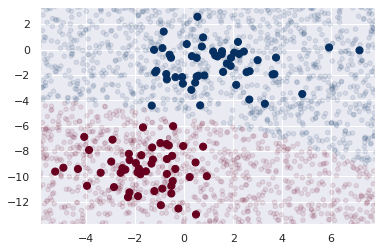

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Мы видим слегка изогнутую границу в классификациях — в общем случае граница в гауссовом наивном байесовском подходе квадратична.

Хорошая часть этого байесовского формализма заключается в том, что он естественным образом допускает вероятностную классификацию, которую мы можем вычислить с помощью метода predict_proba:

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

В столбцах указаны апостериорные вероятности первой и второй метки соответственно.
Если вы ищете оценки неопределенности в своей классификации, подобные байесовские подходы могут оказаться полезными.

Конечно, окончательная классификация будет настолько хороша, насколько хороши предположения модели, которые к ней приводят, поэтому гауссовский наивный байесовский метод часто не дает очень хороших результатов.
Тем не менее, во многих случаях — особенно когда число признаков становится большим — это допущение не настолько вредно, чтобы помешать гауссовскому наивному байесовскому методу быть полезным.

## Полиномиальный наивный байесовский алгоритм

Только что описанное предположение Гаусса ни в коем случае не является единственным простым предположением, которое можно использовать для определения порождающего распределения для каждой метки.
Другим полезным примером является полиномиальный наивный байесовский алгоритм, где предполагается, что признаки получены из простого полиномиального распределения.
Полиномиальное распределение описывает вероятность наблюдения подсчетов среди ряда категорий, и, таким образом, полиномиальный наивный байесовский метод наиболее подходит для функций, которые представляют подсчеты или скорости счета.

Идея точно такая же, как и раньше, за исключением того, что вместо моделирования распределения данных с помощью наилучшего гауссова распределения мы моделируем распределение данных с помощью наилучшего полиномиального распределения.

### Пример: классификация текста

Одним из мест, где часто используется полиномиальный наивный байесовский метод, является классификация текстов, где функции связаны с количеством слов или частотой встречаемости в документах, подлежащих классификации.
Здесь мы будем использовать функции разреженного подсчета слов из корпуса 20 групп новостей, чтобы показать, как мы можем классифицировать эти короткие документы по категориям.

Давайте загрузим данные и посмотрим на группы:

In [1]:
from sklearn.datasets import fetch_20newsgroups # уже готовый датасет

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Для простоты здесь мы выберем только несколько из этих категорий и загрузим набор для обучения и тестирования:

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories) # Разделение выборки на обучение и тест. Как правило датасет делится на 70\20\10 для обучения, теста и валидации соответственно
test = fetch_20newsgroups(subset='test', categories=categories)

Вот репрезентативная запись из данных:

In [5]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Чтобы использовать эти данные для машинного обучения, нам нужно иметь возможность преобразовывать содержимое каждой строки в вектор чисел.
Для этого мы будем использовать векторизатор TF-IDF и создадим конвейер, который прикрепляет его к полиномиальному наивному байесовскому классификатору:

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

С помощью этого конвейера мы можем применить модель к обучающим данным и предсказать метки для тестовых данных:

In [7]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Теперь, когда мы предсказали метки для тестовых данных, мы можем оценить их, чтобы узнать о производительности оценщика.
Например, вот матрица путаницы между истинными и предсказанными метками для тестовых данных:

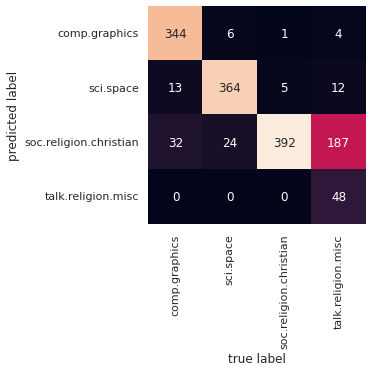

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Очевидно, даже этот очень простой классификатор может успешно отделить разговоры о космосе от разговоров о компьютерах, но путает разговоры о религии и разговоры о христианстве.
Это, возможно, ожидаемая область путаницы!

Самое замечательное здесь то, что теперь у нас есть инструменты для определения категории *любой* строки с помощью метода predict() этого конвейера.
Вот быстрая служебная функция, которая вернет прогноз для одной строки:

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Давайте попробуем:

In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determining the screen resolution')

'comp.graphics'

Помните, что это не что иное, как простая вероятностная модель для (взвешенной) частоты каждого слова в строке; тем не менее, результат поразителен.
Даже очень наивный алгоритм, если его использовать осторожно и обучить на большом наборе многомерных данных, может быть на удивление эффективным.

## Когда использовать наивный байесовский алгоритм

Поскольку наивные байесовские классификаторы делают такие строгие предположения о данных, они, как правило, не будут работать так же хорошо, как более сложные модели.
Тем не менее, они имеют ряд преимуществ:

- Они очень быстры как для обучения, так и для предсказания
- Они обеспечивают прямой вероятностный прогноз
- Они часто очень легко интерпретируются
- У них очень мало (если вообще есть) настраиваемых параметров

Эти преимущества означают, что наивный байесовский классификатор часто является хорошим выбором в качестве начальной базовой классификации.
Если он работает должным образом, то поздравляю: у вас есть очень быстрый, очень интерпретируемый классификатор для вашей задачи.
Если он не работает хорошо, вы можете начать изучать более сложные модели, имея базовые знания о том, насколько хорошо они должны работать.

Наивные байесовские классификаторы, как правило, особенно хорошо работают в одной из следующих ситуаций:

- Когда наивные предположения действительно совпадают с данными (на практике встречается очень редко)
- Для очень хорошо разделенных категорий, когда сложность модели менее важна
- Для очень многомерных данных, когда сложность модели менее важна

Последние две точки кажутся разными, но на самом деле они связаны: по мере роста размера набора данных вероятность того, что какие-либо две точки будут найдены близко друг к другу, гораздо меньше (в конце концов, они должны быть близки во *каждом отдельном измерении*, чтобы быть рядом в целом).
Это означает, что кластеры в больших измерениях, как правило, в среднем более разделены, чем кластеры в низких измерениях, если предположить, что новые измерения действительно добавляют информацию.
По этой причине упрощенные классификаторы, такие как наивные байесовские классификаторы, как правило, работают так же или даже лучше, чем более сложные классификаторы, по мере роста размерности: когда у вас достаточно данных, даже простая модель может быть очень мощной.